# data loading

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import configparser

In [3]:
#dont run it twice

path = os.getcwd()
os.chdir('../')
path


'D:\\Shivam\\Upwork\\JoleneMartin\\1\\notebook'

In [4]:
config = configparser.ConfigParser()
config.read('config.ini')
input_path = config['path']['InputPath']
output_path = config['path']['OutputPath']

In [5]:
pd.options.mode.chained_assignment = None 
np.random.seed(30)

In [6]:
raw_data = pd.read_csv(input_path)
print(raw_data.shape)
raw_data.head()

(30205, 15)


,id,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,over_50k
0,12106,32,Private,HS-grad,9,Divorced,Adm-clerical,Other-relative,Whi t e,Female,0,0,40,United-States,<=50K
1,28951,43,State-gov,Some-college,10,Divorced,Adm-clerical,Unmarried,Whi t e,Female,0,0,40,United-States,<=50K
2,24570,35,Private,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
3,16358,31,Private,NaN,14,Never-married,Prof-specialty,Not-in-family,Black,Male,0,0,40,United-States,<=50K
4,9375,64,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Wife,White,Female,10566,0,35,United-States,<=50K


In [7]:
raw_data.isnull().sum(axis = 0)

id                   0
age                  0
workclass            0
education         3024
education_num        0
marital_status       0
occupation           0
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
over_50k          3271
dtype: int64

## Checking and removing duplicate rows as it wont help the model train

In [8]:
duplicate=raw_data[raw_data.duplicated(subset=None, keep='first')]
print(duplicate.shape)
#duplicate

(717, 15)


In [9]:
unique_data=raw_data.drop_duplicates( keep='first', inplace=False)
print(unique_data.shape)
#unique_data


(29488, 15)


## Checking na

In [10]:
unique_data.isna().sum(axis = 0)

id                   0
age                  0
workclass            0
education         3012
education_num        0
marital_status       0
occupation           0
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country       0
over_50k          3211
dtype: int64

## Removing data with na in over_50k as we cant fill it because it is the Target variable

In [11]:
output_na=unique_data[unique_data['over_50k'].isna()]
output_na['over_50k'].isna().count()

3211

In [12]:
input_data=unique_data[~unique_data['over_50k'].isna()]
input_data.shape

(26277, 15)

## so actual  input data we have is 26277 rows

# correcting wrong label for white in race

In [13]:
print(input_data.groupby('race')['id'].count())



race
Amer-Indian-Eskimo      290
Asian-Pac-Islander      944
Black                  2837
Other                   251
Whi t e                3271
White                 18684
Name: id, dtype: int64


In [14]:
#renaming whi t e 
#input_data.loc[input_data.race == 'Whi t e','Whi t e'] = 'White'
input_data['race'][input_data.race == 'Whi t e'] = 'White'

print(input_data.groupby('race')['id'].count())

race
Amer-Indian-Eskimo      290
Asian-Pac-Islander      944
Black                  2837
Other                   251
White                 21955
Name: id, dtype: int64


## dealing with wrong data of age -1


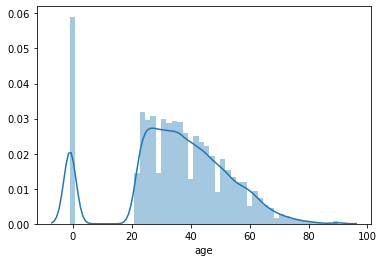

In [15]:
sns.distplot(input_data.age)

In [16]:
c=input_data[input_data['age']<0]['age'].count()
print(f"Age less than zero in dataset {c}")

Age less than zero in dataset 2824


In [17]:
input_data[(input_data['age']<22) & (input_data['over_50k']=='<=50K')]['age'].count()

2821

In [18]:
x=input_data[(input_data['age']<22) & (input_data['over_50k']=='<=50K')]
#x.groupby('workclass').count() 2172
#x.groupby('marital_status').count() 2672
x.groupby('marital_status').count()
#y=input_data[(input_data['marital_status']=='Never-married')]
#list(y.groupby('age')['id'].count())

,id,age,workclass,education,education_num,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,over_50k
marital_status,,,,,,,,,,,,,,
Divorced,15,15,15,14,15,15,15,15,15,15,15,15,15,15
Married-AF-spouse,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Married-civ-spouse,100,100,100,91,100,100,100,100,100,100,100,100,100,100
Married-spouse-absent,12,12,12,12,12,12,12,12,12,12,12,12,12,12
Never-married,2672,2672,2672,2396,2672,2672,2672,2672,2672,2672,2672,2672,2672,2672
Separated,19,19,19,17,19,19,19,19,19,19,19,19,19,19
Widowed,1,1,1,1,1,1,1,1,1,1,1,1,1,1


### most of the na in age are never  married 

In [19]:
c=input_data[input_data['age']<0]['age'].count()
print(f"Age less than zero in dataset {c}")

Age less than zero in dataset 2824


# age imputation of never married uniformly

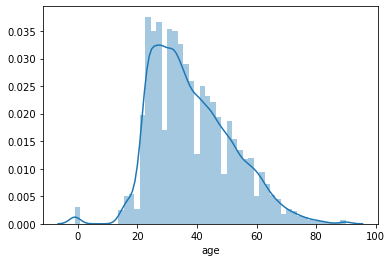

In [20]:
x=((input_data['age'] == -1) & (input_data['marital_status']=='Never-married'))

input_data.loc[((input_data['age'] == -1) & (input_data['marital_status']=='Never-married')),'age'] =np.random.randint(15,35, len(input_data.loc[((input_data['age'] == -1) & (input_data['marital_status']=='Never-married'))]))
sns.distplot(input_data.age)

In [21]:
c=input_data[input_data['age']<0]['age'].count()
print(f"Age less than zero in dataset {c}")

Age less than zero in dataset 150


In [22]:
input_data['age'][input_data.age == -1] = np.nan
input_data['age'].isna().sum()

150

In [23]:
input_data=input_data[~input_data['age'].isna()]
input_data.shape

(26127, 15)

## Dealing with ? in data

In [24]:
input_data['native_country'][input_data.native_country == '?'] = np.nan
input_data['workclass'][input_data.workclass == '?'] = np.nan
input_data['occupation'][input_data.occupation == '?'] = np.nan


In [25]:
workclass_q=input_data[input_data['workclass']=='?']['id'].count()
native_country_q=input_data[input_data['native_country']=='?']['id'].count()
occupation_q=input_data[input_data['occupation']=='?']['id'].count()
print (f"? in workclass is {workclass_q} native_country is {native_country_q} occupation is {occupation_q}")


? in workclass is 0 native_country is 0 occupation is 0


# total actual null 

In [26]:
input_data.isna().sum().sum()

6301

In [27]:
input_data[
    (input_data['occupation'].isnull())
           |  (input_data['workclass'].isnull() ) 
           |  (input_data['native_country'].isnull())
         
           |  (input_data['education'].isnull())
        
]['id'].count() # it means there are rows with more than one variable having nan

4493

In [28]:


input_data[
    ((
        input_data['occupation'].isnull())
           |  (input_data['workclass'].isnull() ) 
           |  (input_data['native_country'].isnull())
        
           |  (input_data['education'].isnull())
          
    )
    
           & (input_data['over_50k']=='<=50K')
]['id'].count()

3942

# dropping the null data ROWS  of over_50k not true area to help solving data imbalance

In [29]:
print(input_data['id'].count())
dropped_data=input_data[~
    ((
        (input_data['occupation'].isnull())
           |  (input_data['workclass'].isnull() )
           |  (input_data['native_country'].isnull())
           |  (input_data['education'].isnull())
    )
           
        
        & (input_data['over_50k']=='<=50K'))
]
dropped_data['id'].count()

26127


22185

# dealing with remaining NA

In [30]:
dropped_data[
    (dropped_data['education'].isnull()) 
           |  (dropped_data['workclass'].isnull() ) 
           |  (dropped_data['native_country'].isnull())
          
           |  (dropped_data['occupation'].isnull())
           #| (dropped_data['age']<0)
]['id'].count()

551

In [31]:
workclass_q=dropped_data[dropped_data['workclass'].isnull()]['id'].count()
native_country_q=dropped_data[dropped_data['native_country'].isnull()]['id'].count()
occupation_q=dropped_data[dropped_data['occupation'].isnull()]['id'].count()
print (f"NA in workclass is {workclass_q} native_country is {native_country_q} occupation is {occupation_q}")


NA in workclass is 101 native_country is 68 occupation is 101


## Dropping off the common row in workclass and occupation NA

In [32]:
dropped_data[
            (   dropped_data['occupation'].isnull())
           & (dropped_data['workclass'].isnull() ) 
          ]['id'].count()

101

In [33]:
print(input_data['id'].count())
dropped_data=dropped_data[~
    ((   dropped_data['occupation'].isnull())
           & (dropped_data['workclass'].isnull() ) )
]
dropped_data['id'].count()

26127


22084

In [34]:
workclass_q=dropped_data[dropped_data['workclass'].isnull()]['id'].count()
native_country_q=dropped_data[dropped_data['native_country'].isnull()]['id'].count()
occupation_q=dropped_data[dropped_data['occupation'].isnull()]['id'].count()
print (f"NA in workclass is {workclass_q} native_country is {native_country_q} occupation is {occupation_q}")


NA in workclass is 0 native_country is 64 occupation is 0


# now we will fill the remaining nan

In [35]:
print("nan left",dropped_data.isna().sum().sum())
mod=dropped_data['native_country'].mode()
dropped_data['native_country'][dropped_data.native_country.isnull()] = 'United-States'
print("nan left",dropped_data.isna().sum().sum())

dropped_data = dropped_data.fillna(dropped_data['education'].value_counts().index[0])
print("nan left",dropped_data.isna().sum().sum())

nan left 459
nan left 395
nan left 0


In [36]:
data=dropped_data
data.shape

(22084, 15)

# saving data

In [37]:
data.to_csv(output_path,index=False)